Series

In [1]:
import pandas as pd

data = [100, 102, 104, 200, 202]

series = pd.Series(data, index=["a", "b", "c", "d", "e"])

series[series >= 200] #prints values greater than or equal to 200


d    200
e    202
dtype: int64

In [2]:
import pandas as pd

calories = {"Day 1": 1750, "Day 2": 2100, "Day 3": 1700}
series = pd.Series(calories)

#two ways to update the series
series["Day 3"] = 1800
series.loc["Day 3"] = 300

#eaten more than 2000
series[series > 2000]



Day 2    2100
dtype: int64

DataFrames

In [3]:
data = {"name": ["spongebob", "patric", "squidward"],
        "age": [30,35,50]
}

df = pd.DataFrame(data, index=[f"Employee {i}" for i in range(1,4)]) #df
df.loc["Employee 2"] #look at employee 2
df["Adress"] = ["alabama", "new mexico", "newkurky"] # new column

#new row
new_rows = pd.DataFrame([{"name": "sandy", "age": 30, "Adress": "pinaple"},
                        {"name": "crabbyboy", "age": 45, "Adress": "in the cage"}],
                        index=["Employee 4","masterboy"])
df = pd.concat([df, new_rows]) #concatination adding the two dataframes
df

,name,age,Adress
Employee 1,spongebob,30,alabama
Employee 2,patric,35,new mexico
Employee 3,squidward,50,newkurky
Employee 4,sandy,30,pinaple
masterboy,crabbyboy,45,in the cage


Importing

In [4]:
df = pd.read_csv("pokemon.csv", sep=",", index_col="No")

#selection by column
df[["Name","Height","Weight"]] #prints a df with columns name, height and weight

#make a copy dataframe
new_df = df[["Name","Height","Weight"]].copy()
new_df["Height"] = new_df["Height"]/10

df.query("Name == 'Pikachu'")[["Name","Height","Legendary"]] #to find a spesific pokemon, use singel quotas

#set name as index to show items inbetween
df = df.set_index("Name")
df.loc["Charizard":"Blastoise"]

,Type1,Type2,Height,Weight,Legendary
Name,,,,,
Charizard,Fire,Flying,1.7,90.5,0
Squirtle,Water,NaN,0.5,9.0,0
Wartortle,Water,NaN,1.0,22.5,0
Blastoise,Water,NaN,1.6,85.5,0


In [5]:

#search for a pokemon of choice
prompt = input("What pokemon do you want?: ")
try:
    print(df.loc[prompt])
except KeyError:
    print(f"pokemon {prompt} not found")


pokemon hei not found


Filtering

In [6]:
#keeping the rows mathcing a condition
#df = df.query("Weight > 10") #dropping rows with lower weigth
tall_pokemon_df = df[df["Height"]>2]
heavy_pokemon_df = df[df["Weight"]> 100]
ledgendary_pokemon_df = df[df["Legendary"]== True] #True == 1, could also write ==1
df_extended = pd.concat([tall_pokemon_df, heavy_pokemon_df, ledgendary_pokemon_df]) #making a df with the new dataframes
water_pokemon = df[(df["Type1"]=="Water") | #| == or (it means or)
                   (df["Type2"]=="Water")
                   ]
ff_pokemon = df[(df["Type1"]== "Fire") & 
                (df["Type2"]=="Flying")
                ]
ff_pokemon
df


,Type1,Type2,Height,Weight,Legendary
Name,,,,,
Bulbasaur,Grass,Poison,0.7,6.9,0
Ivysaur,Grass,Poison,1.0,13.0,0
Venusaur,Grass,Poison,2.0,100.0,0
Charmander,Fire,NaN,0.6,8.5,0
Charmeleon,Fire,NaN,1.1,19.0,0
...,...,...,...,...,...
Moltres,Fire,Flying,2.0,60.0,1
Dratini,Dragon,NaN,1.8,3.3,0
Dragonair,Dragon,NaN,4.0,16.5,0


Aggregation

In [7]:
#reduce a set of values into a single value. summerize and analyze data.
#often used with the groupby() function
#df.groupby(["Height"]).mean()
df.mean(numeric_only=True) #finding the means of numeric values
df.sum(numeric_only=True) #summing all the numbers
df.median(numeric_only=True) #median values
df.max(numeric_only=True) #max values
df.query("Height == '8.8'")
df[df["Height"]>8.7]
df.count() #counts the number of observations

#making a new dataframe with averages
df_avg = pd.DataFrame([df["Height"].mean(),df["Weight"].mean(),df["Legendary"].mean()],
                       index=["height","Weight","legendary"])
df_avg.index.name = "Parameters"
df_avg.columns = ["Means"]
df_avg



,Means
Parameters,
height,1.200000
Weight,46.231333
legendary,0.026667


<BarContainer object of 15 artists>

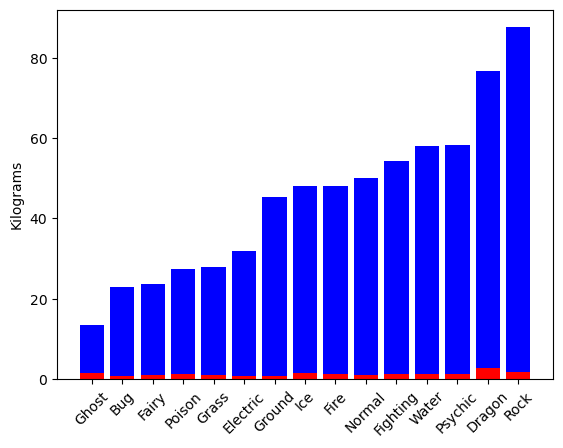

In [8]:
#groupby
#graphing the avrage weight by Type1 in a barchart
group_weight = df.groupby("Type1")["Weight"].mean().sort_values()
group_height = df.groupby("Type1")["Height"].mean()
import matplotlib.pyplot as plt
plt.Figure(figsize=(10,5)) # making it wider
plt.xticks(rotation=45, fontsize = 10) #rotating the x-tics by 45 degrees and making font smaller
plt.ylabel("Kilograms")
plt.bar(group_weight.index, group_weight.values, color = "Blue") #plotting with index as x-values and values as y-values
plt.bar(group_height.index, group_height.values, color = "Red")


In [9]:
df.groupby("Type1")["Height"].max().sort_values()


Type1
Fairy       1.3
Bug         1.5
Electric    1.6
Fighting    1.6
Ghost       1.6
Ice         1.7
Ground      1.9
Fire        2.0
Grass       2.0
Psychic     2.0
Normal      2.2
Poison      3.5
Dragon      4.0
Water       6.5
Rock        8.8
Name: Height, dtype: float64

Datacleaning

In [10]:
#fixing or removing irrelevant data. 70% of work with pandas is data cleaning

#dropping columns
df.drop(columns=["Legendary"])

#handle missing data
#if a row is missing a value in type2, we will drop that row
df.dropna(subset=["Type2"]) #dropna: drops not available. drop all rows within "Type2"

#filling inn for missing data
df.fillna({"Type2": "None"})#replacing missing values

#fix inconsitent values
#change grass to all uppercase
df.loc[df["Type1"]=="Grass", "Type1"] = "GRASS" # locates by label in "Type1" column, in column "Type1" = "GRASS"
#or (better verion)
df["Type1"] = df["Type1"].replace({"Grass":"GRASS"
                                   ,"Fire":"FIRE"}) 
df




,Type1,Type2,Height,Weight,Legendary
Name,,,,,
Bulbasaur,GRASS,Poison,0.7,6.9,0
Ivysaur,GRASS,Poison,1.0,13.0,0
Venusaur,GRASS,Poison,2.0,100.0,0
Charmander,FIRE,NaN,0.6,8.5,0
Charmeleon,FIRE,NaN,1.1,19.0,0
...,...,...,...,...,...
Moltres,FIRE,Flying,2.0,60.0,1
Dratini,Dragon,NaN,1.8,3.3,0
Dragonair,Dragon,NaN,4.0,16.5,0


In [11]:
#resets index, so names are no longer index
df = df.reset_index()

In [ ]:
#standardize text
df["Name"] = df["Name"].str.lower()

#change legendrary: 0 and 1 to true and false 
df["Legendary"] = df["Legendary"].replace({0:False,  #using replace
                                           1: True})
df["Legendary"] = df["Legendary"].astype(bool) #better way: using astype
df


,Name,Type1,Type2,Height,Weight,Legendary
0,bulbasaur,GRASS,Poison,0.7,6.9,False
1,ivysaur,GRASS,Poison,1.0,13.0,False
2,venusaur,GRASS,Poison,2.0,100.0,False
3,charmander,FIRE,NaN,0.6,8.5,False
4,charmeleon,FIRE,NaN,1.1,19.0,False
...,...,...,...,...,...,...
145,moltres,FIRE,Flying,2.0,60.0,True
146,dratini,Dragon,NaN,1.8,3.3,False
147,dragonair,Dragon,NaN,4.0,16.5,False
148,dragonite,Dragon,Flying,2.2,210.0,False


In [18]:
#removing duplicates
df = df.drop_duplicates()
df

,Name,Type1,Type2,Height,Weight,Legendary
0,bulbasaur,GRASS,Poison,0.7,6.9,False
1,ivysaur,GRASS,Poison,1.0,13.0,False
2,venusaur,GRASS,Poison,2.0,100.0,False
3,charmander,FIRE,NaN,0.6,8.5,False
4,charmeleon,FIRE,NaN,1.1,19.0,False
...,...,...,...,...,...,...
145,moltres,FIRE,Flying,2.0,60.0,True
146,dratini,Dragon,NaN,1.8,3.3,False
147,dragonair,Dragon,NaN,4.0,16.5,False
148,dragonite,Dragon,Flying,2.2,210.0,False
